In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
voice_file = "voice.wav"
ipd.Audio(voice_file)

In [3]:
voice, sr = librosa.load(voice_file)

In [4]:
FRAME_SIZE = 2048
HOP_SIZE = 512

S_voice = librosa.stft(voice, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
print(S_voice.shape)
type(S_voice[0][0])

(1025, 1292)


numpy.complex64

In [5]:
Y_scale = np.abs(S_voice) ** 2
print(Y_scale.shape)

(1025, 1292)


In [6]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

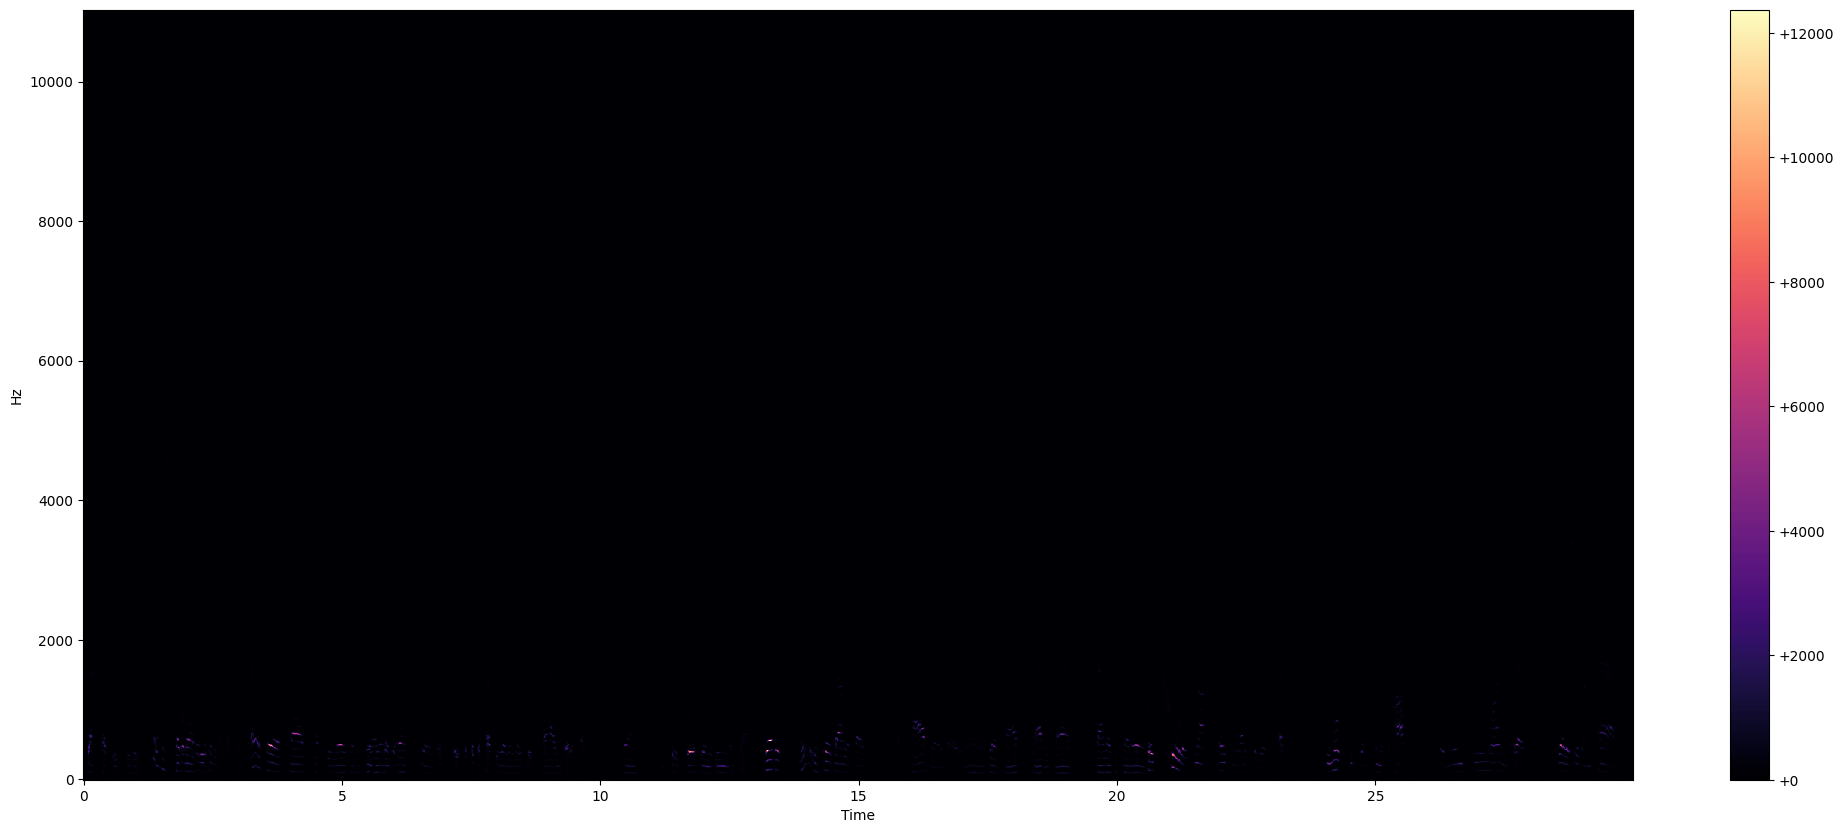

In [7]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

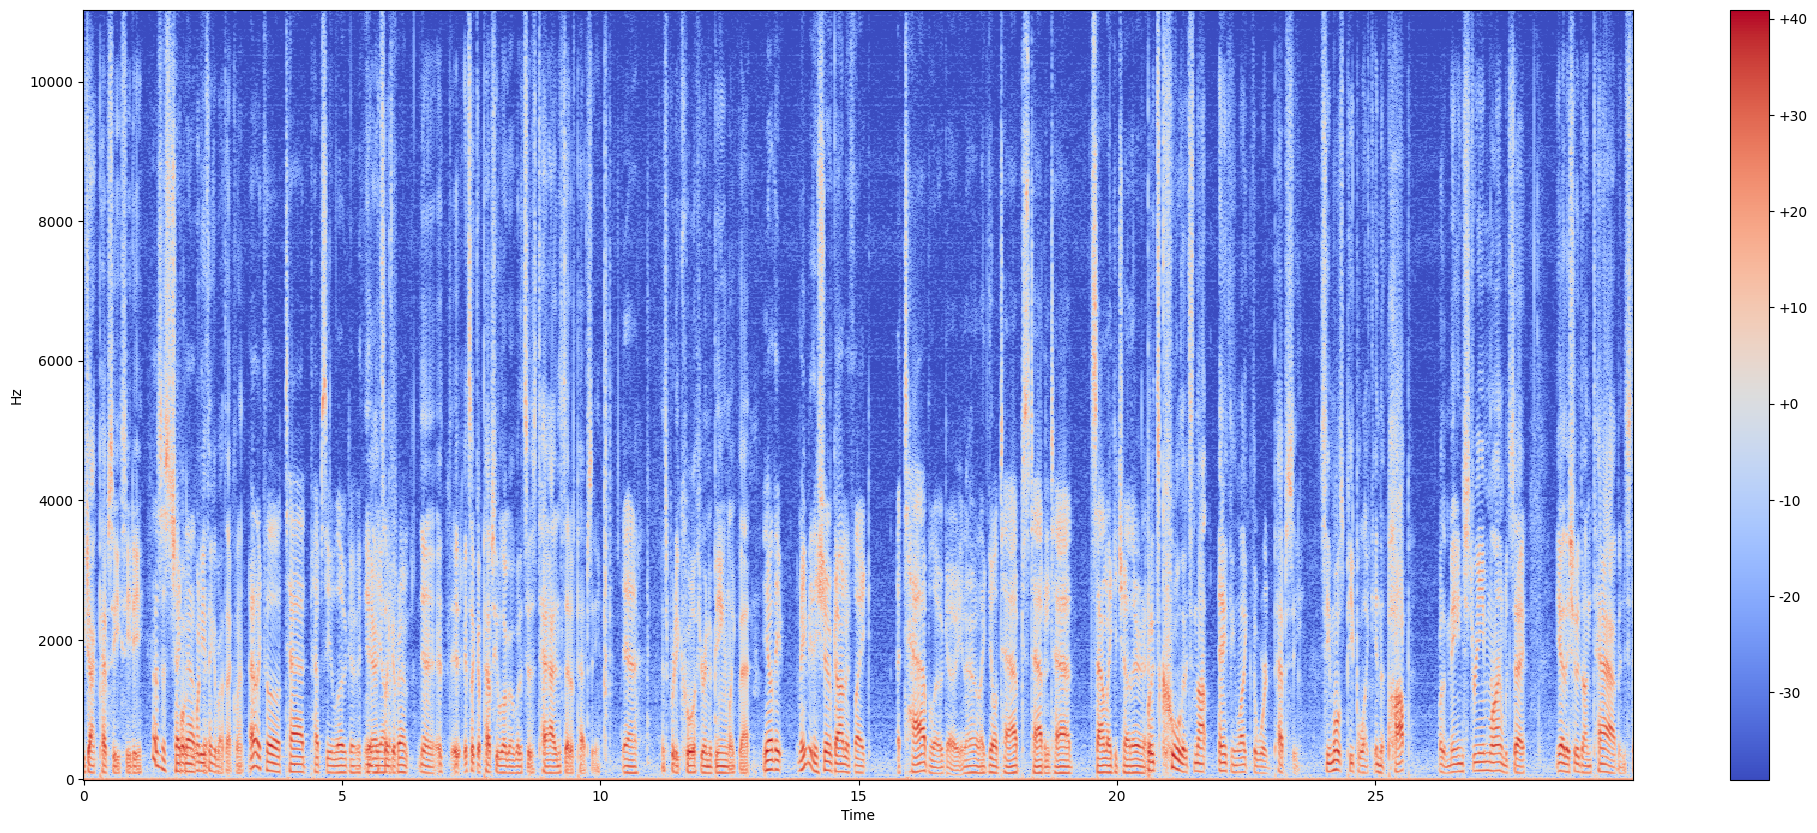

In [8]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

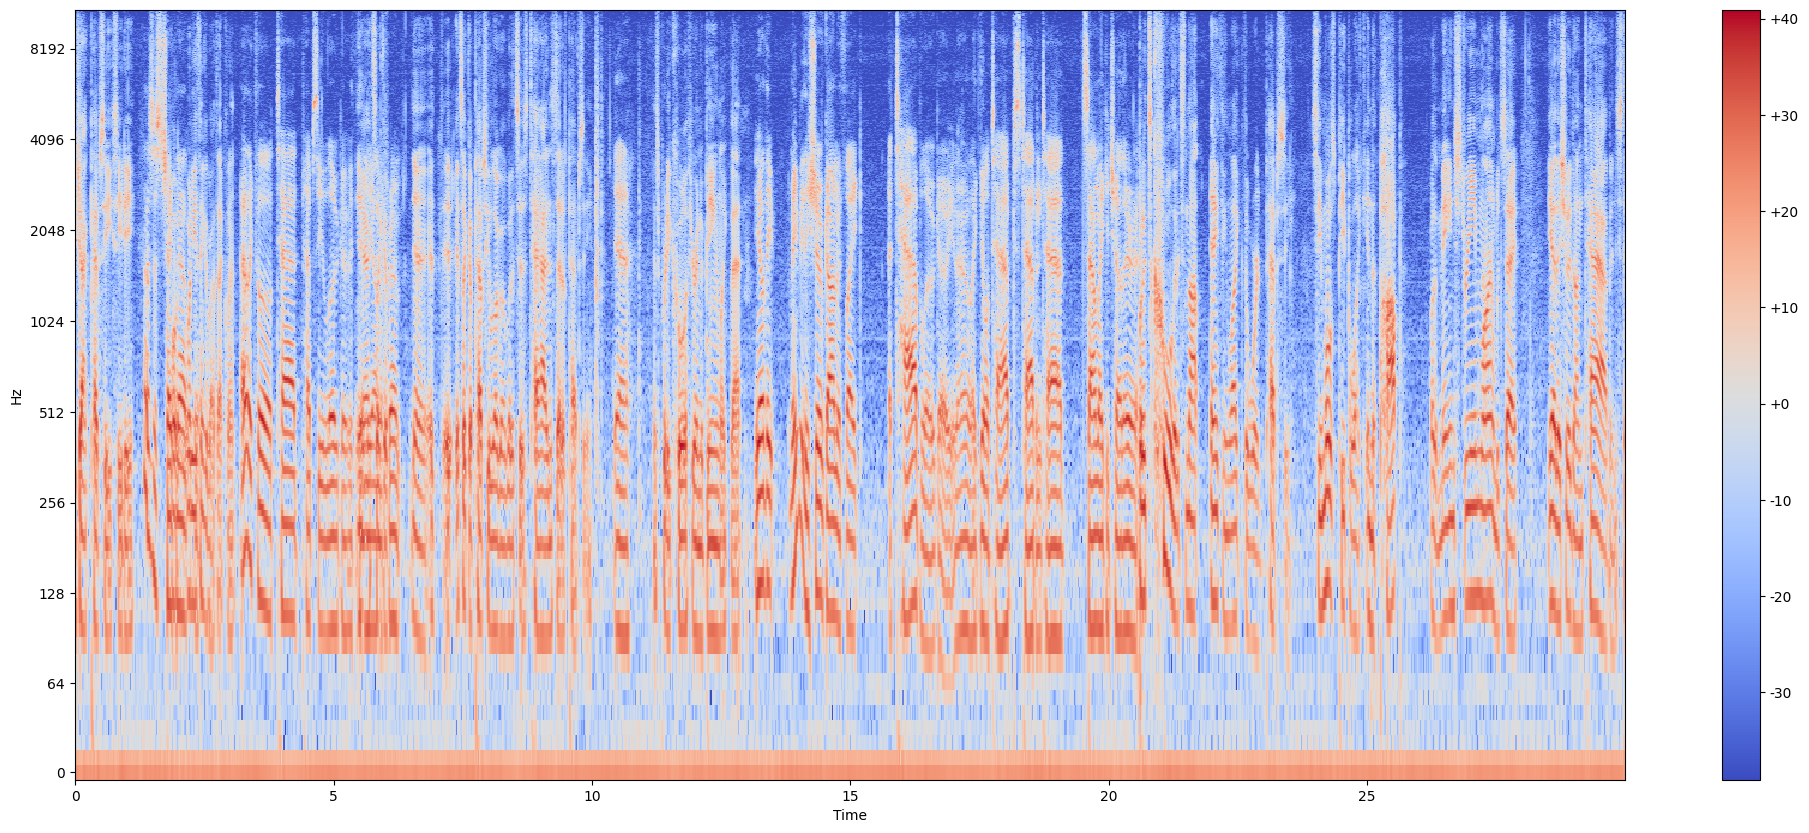

In [9]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")